In [10]:
# Alexander Domagala
# ECE 6560 - Final Project - Gradient Analysis
# Spring 2024

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

(100, 100)


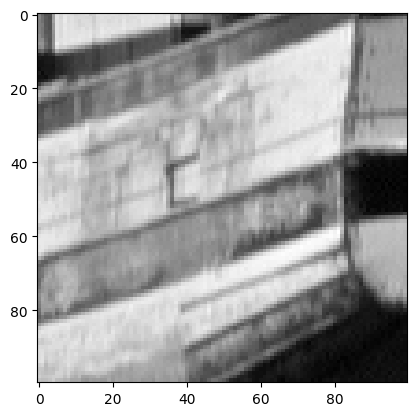

In [5]:
# load image
start_pix = 300
end_pix = start_pix+100
img = Image.open('../images/boats.bmp')
img = np.array(img)
img = img[start_pix:end_pix,start_pix:end_pix]

# display image
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

(100, 100)


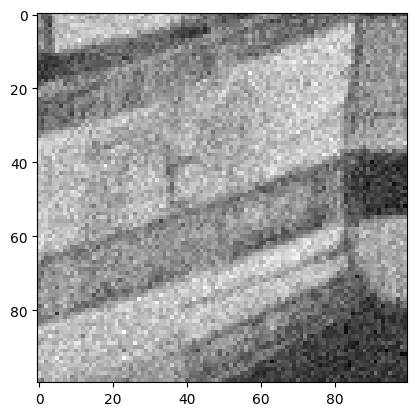

In [11]:
# add noise to image
mean = 0
std_dev = 20
noise = np.random.normal(mean, std_dev, (img.shape[0],img.shape[1]))
noisy_img = img + noise

# display image
print(noisy_img.shape)
plt.imshow(noisy_img, cmap='gray')
plt.show()

In [26]:
# function returns a 1-dimensional array of gradient magnitudes contained
# in the image, iterates through all pixels except the borders of the image

def GradientHist(I):
  gradients = []
  for i in range(1,I.shape[0]-1):
    for j in range(1,I.shape[1]-1):
      Ix = (I[i+1,j] - I[i-1,j])/2
      Iy = (I[i,j+1] - I[i,j-1])/2
      ret = np.sqrt(np.power(Ix,2) + np.power(Iy,2))
      gradients.append(ret)
  return np.array(gradients)

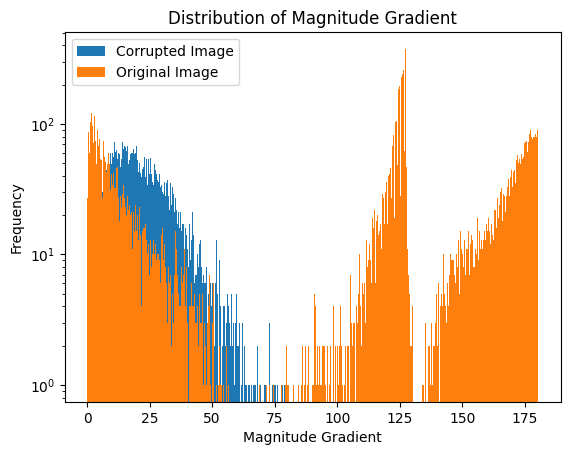

In [27]:
# compute gradients for both images
img_grads = GradientHist(img)
noisy_img_grads = GradientHist(noisy_img)

# display gradient distributions
plt.title('Distribution of Magnitude Gradient')
plt.hist(noisy_img_grads,bins=500,log=True,label='Corrupted Image')
plt.hist(img_grads,bins=500,log=True,label='Original Image')
plt.xlabel('Magnitude Gradient')
plt.ylabel('Frequency')
plt.legend()
plt.show()

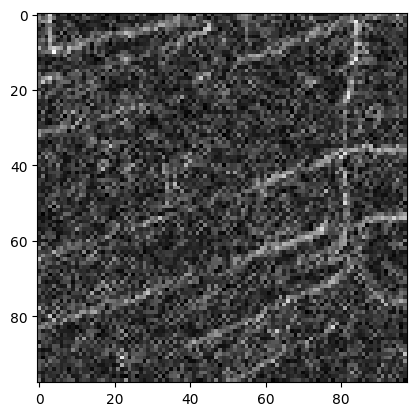

In [21]:
# display gradient values for noisy image
reshape_noise = np.array(noisy_img_grads).reshape((98,98))
plt.imshow(reshape_noise,cmap='gray')
plt.show()